In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df=pd.read_csv(filepath,header=None)

In [7]:
df.columns=['age','gender','bmi','no_of_children','smoker','region','charges']

In [8]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [9]:
df.isna().sum()

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64

In [11]:
df.replace('?',np.NaN,inplace=True)

In [12]:
df.isna().sum()

age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [17]:
df['age']=df['age'].astype(float)

In [18]:
avg=df['age'].mean()
df['age']=df['age'].fillna(avg)

In [19]:
cate=df['smoker'].value_counts().idxmax()
df['smoker']=df['smoker'].fillna(cate)

In [20]:
df.isna().sum()

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64

In [23]:
def reggplot(data1,data2):
    sns.regplot(x=data1,y=data2)
    plt.title('Regression Plot for Charges')
    plt.ylabel('Charges')



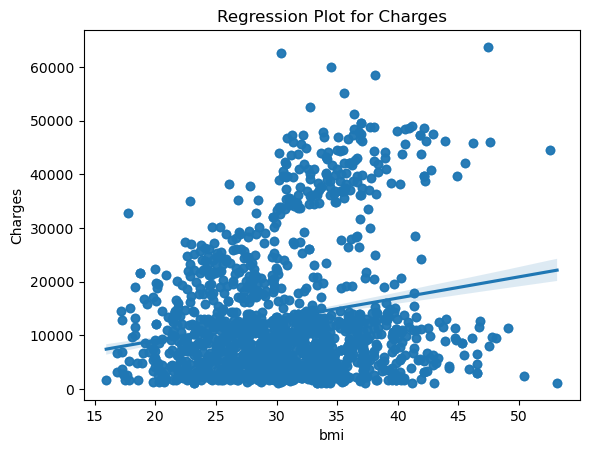

In [24]:
reggplot(df['bmi'],df['charges'])

<Axes: xlabel='smoker', ylabel='charges'>

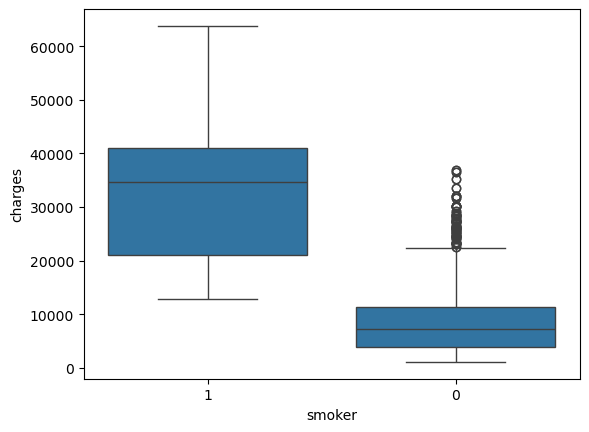

In [26]:
sns.boxplot(x='smoker',y='charges',data=df)

In [27]:
var=df.select_dtypes(include=['int64','float64']).columns.to_list()

In [30]:
from scipy.stats import pearsonr
for col in var :
   if col=='charges':
      break
   corr,p_value=pearsonr(df[col],df['charges'])
   print(f'The coorelation coefficient between {col} and charges is {corr} and p values is {p_value}')

The coorelation coefficient between age and charges is 0.2986215590165583 and p values is 3.32244651936236e-58
The coorelation coefficient between gender and charges is 0.06283682831973225 and p values is 0.0009325439388300717
The coorelation coefficient between bmi and charges is 0.19984604873978873 and p values is 2.2935230918641643e-26
The coorelation coefficient between no_of_children and charges is 0.06644231780125452 and p values is 0.00046444822980333197
The coorelation coefficient between region and charges is 0.05405752653994991 and p values is 0.004414512053676313


In [31]:
from sklearn.linear_model import LinearRegression


In [32]:
lr=LinearRegression()

In [34]:
lr.fit(df[['smoker']],df[['charges']])

LinearRegression()

In [35]:
lr.coef_

array([[23805.26535248]])

In [36]:
lr.intercept_

array([8417.87441114])

In [37]:
yhat=lr.predict(df[['smoker']])

In [38]:
lr.score(df[['smoker']],df[['charges']])

0.6221791718835359

(0.0, 66902.8557155)

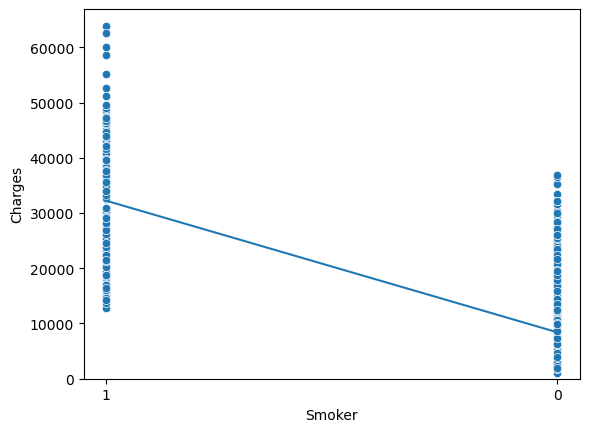

In [41]:
sns.scatterplot(x='smoker',y='charges',data=df)
plt.plot(df['smoker'],yhat)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.ylim(0,)

<Axes: xlabel='charges', ylabel='Density'>

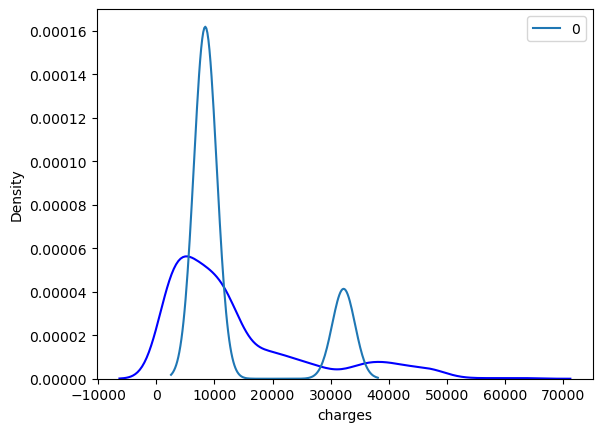

In [42]:
sns.kdeplot(df['charges'],color='blue',label='Actual Values')
sns.kdeplot(yhat,color='red',label='Predicted Values')

In [43]:
from sklearn.model_selection import train_test_split
x=df[['smoker']]
y=df[['charges']]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [54]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [45]:
r=Ridge(alpha=0.1)

In [48]:
r.fit(xtrain,ytrain)

Ridge(alpha=0.1)

In [49]:
r.score(x,y)

0.6220956829218272

In [51]:
yhat_1=r.predict(xtest)

In [52]:
r.score(xtest,ytest)

0.5991181845003428

In [55]:
from sklearn.pipeline import Pipeline
input=[('polynomial',PolynomialFeatures(degree=2,include_bias=False)),('model',Ridge(alpha=0.1))]
pipe=Pipeline(input)

In [56]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Ridge(alpha=0.1))])

In [57]:
pipe.score(xtest,ytest)

0.5991270024820895